<a href="https://colab.research.google.com/github/MEPritchard/EduPerformance/blob/main/eduperformance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A high School has just finished a survery of it's students hoping to learn about what potential enviornemtnal factors could be contributing to the success or struggles of their students. The over all goal is to identify actionable items that increase the success of all students.**

#Import Data From Github orginally from Kaggle
https://www.kaggle.com/datasets/dillonmyrick/high-school-student-performance-and-demographics

school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

sex - student's sex (binary: "F" - female or "M" - male)

age - student's age (numeric: from 15 to 22)

address_type - student's home address type (binary: "Urban" or "Rural")

family_size - family size (binary: "Less or equal to 3" or "Greater than 3")

parent_status - parent's cohabitation status (binary: "Living together" or "Apart")

mother_education - mother's education (ordinal: "none", "primary education (4th grade)", "5th to 9th grade", "secondary education" or "higher education")

father_education - father's education (ordinal: "none", "primary education (4th grade)", "5th to 9th grade", "secondary education" or "higher education")

mother_job - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

father_job - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")

guardian - student's guardian (nominal: "mother", "father" or "other")

travel_time - home to school travel time (ordinal: "<15 min.", "15 to 30 min.", "30 min. to 1 hour", or 4 - ">1 hour")

study_time - weekly study time (ordinal: 1 - "<2 hours", "2 to 5 hours", "5 to 10 hours", or ">10 hours")

class_failures - number of past class failures (numeric: n if 1<=n<3, else 4)

school_support - extra educational support (binary: yes or no)

family_support - family educational support (binary: yes or no)

extra_paid_classes - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher_ed - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic_relationship - with a romantic relationship (binary: yes or no)

family_relationship - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

free_time - free time after school (numeric: from 1 - very low to 5 - very high)

social - going out with friends (numeric: from 1 - very low to 5 - very high)

weekday_alcohol - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

weekend_alcohol - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

**These grades are related with the course subject, Math or Portuguese:**

grade_1 - first period grade (numeric: from 0 to 20)

grade_2 - second period grade (numeric: from 0 to 20)

final_grade - final grade (numeric: from 0 to 20, output target)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url_math = "https://github.com/MEPritchard/EduPerformance/raw/main/student_math_clean.csv"
url_portugese = "https://github.com/MEPritchard/EduPerformance/raw/main/student_portuguese_clean.csv"

In [3]:
df1 = pd.read_csv(url_math)
df2 = pd.read_csv(url_portugese)

#Most of the data from url portuguese is repetitive, save grades and absences. Manually drop all columns between 'students' and 'grade_1_x'.

In [4]:
df2 = df2.drop(df2.columns[1:30], axis = 1)

In [5]:
merged_df = pd.merge(df1, df2, on='student_id')
merged_df.head()

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,weekend_alcohol,health,absences_x,grade_1_x,grade_2_x,final_grade_x,absences_y,grade_1_y,grade_2_y,final_grade_y
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,...,1,3,6,5,6,6,4,0,11,11
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,1,3,4,5,5,6,2,9,11,11
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,...,3,3,10,7,8,10,6,12,13,12
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,...,1,5,2,15,14,15,0,14,14,14
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,2,5,4,6,10,10,0,11,13,13


In [6]:
merged_df=merged_df.rename(columns={'absences_x':'absences_math','grade_1_x':'grade_1_math', 'grade_2_x':'grade_2_math', 'final_grade_x':'final_grade_math', 'absences_y':'absences_portuguese', 'grade_1_y':'grade_1_portuguese', 'grade_2_y':'grade_2_portuguese', 'final_grade_y':'final_grade_portuguese' })

#A majority of the values in this are string object data types. The number of unique responses is low. Casting all objects to int type to catagorize.

In [7]:
def index_unique_responses(dataframe):
    """
    Iterate through each column in a DataFrame. If the data type of the column is object,
    it lists unique values and indexes each unique response from 1 to n.

    Returns:
    - DataFrame with unique responses indexed from 1 to n for object-type columns
    """
    def index_column(column):
        unique_values = column.unique()
        mapping = {value: index+1 for index, value in enumerate(unique_values)}
        return column.map(mapping)

    indexed_dataframe = dataframe.copy()
    for column in indexed_dataframe.columns:
        if indexed_dataframe[column].dtype == 'object':
            indexed_dataframe[column] = index_column(indexed_dataframe[column])
    return indexed_dataframe

In [8]:
#drop 'student_id' for scale.
int_df=index_unique_responses(merged_df.drop(columns=['student_id']))
#int_df.info()
#check all dtypes

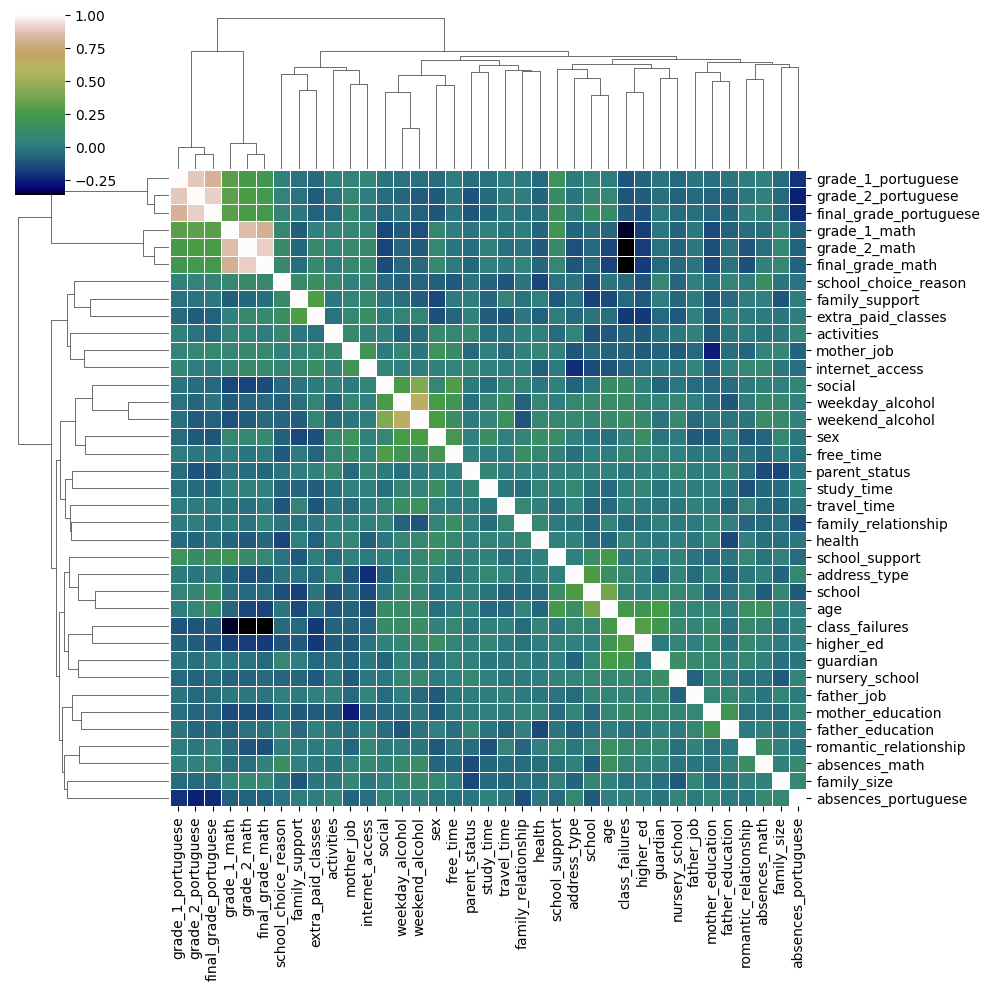

In [9]:
#Bird's eye view of things that seem related to each other [math grades : portu grades], [sex, alcohol, social],
sns.clustermap(int_df.corr(), linewidths=.5, cmap='gist_earth')

In [10]:
#create place holder column
absences_p_column = int_df.pop('absences_portuguese')
# insert the 'absences_p' column at position 31
int_df.insert(30, 'absences_portuguese', absences_p_column)

#By converting all values in the dataset to a correlated value allows a clustermap to depict and organize the largest contributor/detractors to grades.

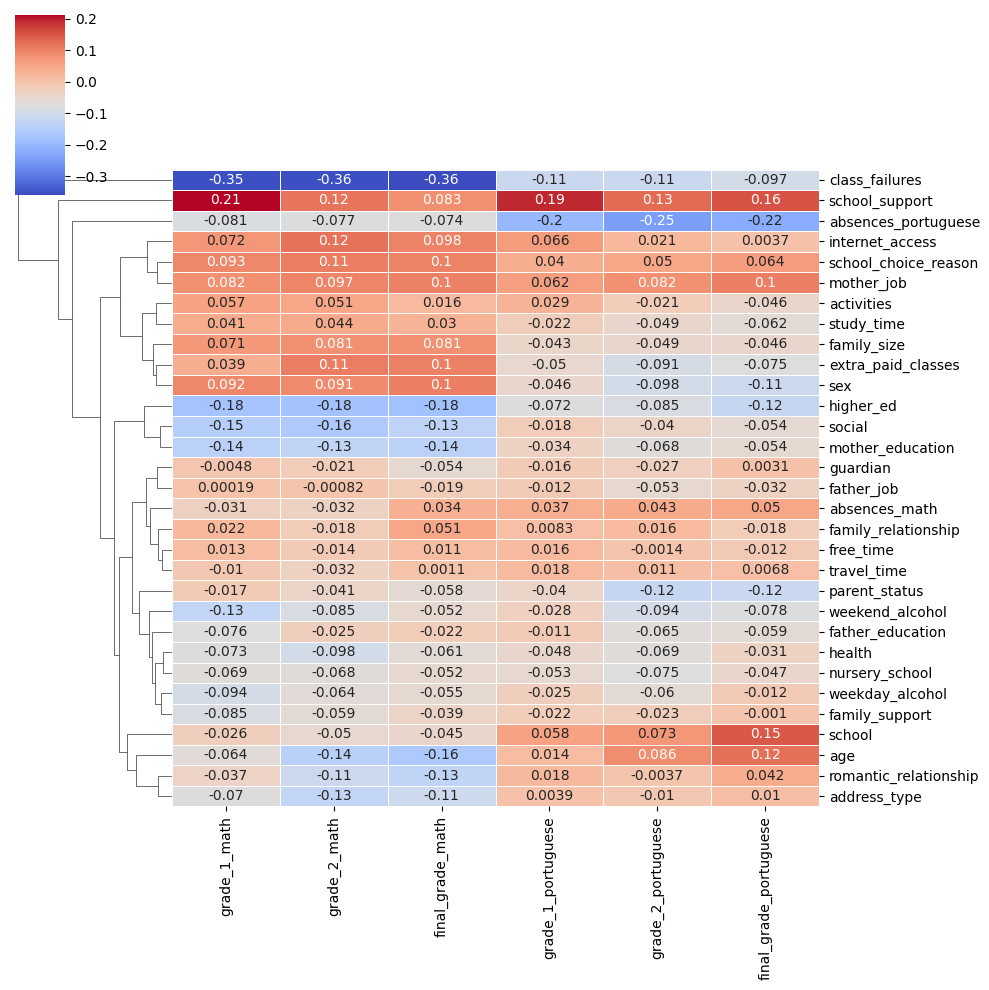

In [11]:
df = pd.DataFrame(int_df).corr()

# Select the last 6 columns for the y-axis and the first 28 columns for the x-axis
df_clustermap = df.iloc[:, :31]

# Create the clustermap
sns.clustermap(df_clustermap.T.iloc[::-1, -6:], row_cluster=True, col_cluster=False, cmap='coolwarm',linewidths=.5, annot=True)

plt.show()

In [12]:
#The goal of the school is to increase the overall math and portugese grades across the school
# My plan is to create a Df of the lowest 25% in math and a Df in the lowest score of portu. inspect both then merge the two and remove duplicates

In [13]:
column_grades = ['student_id','grade_1_math', 'grade_2_math', 'final_grade_math', 'grade_1_portuguese', 'grade_2_portuguese', 'final_grade_portuguese']
grades_df = merged_df[column_grades].copy()

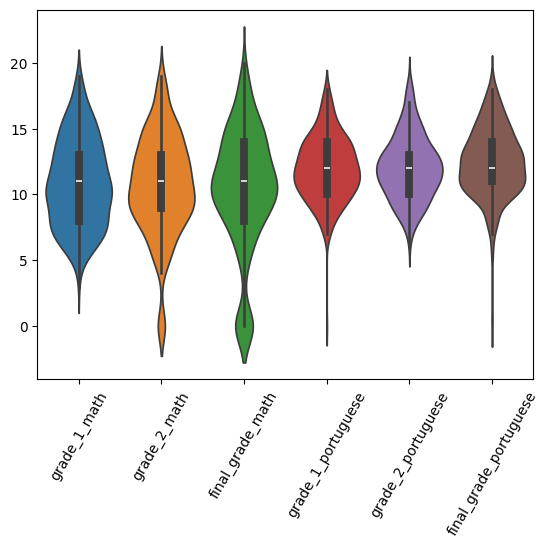

In [14]:
sns.violinplot(grades_df.drop(columns='student_id'))
plt.xticks(rotation=60)
plt.show()

In [15]:
grades_df.describe().drop('count')

,student_id,grade_1_math,grade_2_math,final_grade_math,grade_1_portuguese,grade_2_portuguese,final_grade_portuguese
mean,198.000000,10.908861,10.713924,10.415190,12.005063,12.035443,12.460759
std,114.170924,3.319195,3.761505,4.581443,2.420298,2.417945,2.604244
min,1.000000,3.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,99.500000,8.000000,9.000000,8.000000,10.000000,10.000000,11.000000
50%,198.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000
75%,296.500000,13.000000,13.000000,14.000000,14.000000,13.000000,14.000000
max,395.000000,19.000000,19.000000,20.000000,18.000000,19.000000,19.000000


In [16]:
def bottom_25_percent(df, column_name):
    # Sort the DataFrame by the specified column in ascending order
    sorted_df = df.sort_values(by=column_name, ascending=False)

    # Calculate the threshold for the top 25%
    threshold = int(len(sorted_df) * 0.25)

    # Get the top 25% of entries
    top_25_df = sorted_df.tail(threshold)

    return top_25_df

In [17]:

grade1m = bottom_25_percent(grades_df, 'grade_1_math')
grade2m = bottom_25_percent(grades_df, 'grade_2_math')
fgradem = bottom_25_percent(grades_df, 'final_grade_math')
grade1p = bottom_25_percent(grades_df, 'grade_1_portuguese')
grade2p = bottom_25_percent(grades_df, 'grade_2_portuguese')
fgradep = bottom_25_percent(grades_df, 'final_grade_portuguese')


In [18]:
def join_grades(dataframes, axis=0):
    """
    Joins multiple DataFrames along the specified axis and drops duplicates.

    Parameters:
        dataframes (list): A list of DataFrames to join.
        axis (int, default=0): The axis along which to join the DataFrames.

    Returns:
        DataFrame: Merged DataFrame with duplicates removed.
    """
    # Concatenate the DataFrames
    merged_df = pd.concat(dataframes, axis=axis, ignore_index=True)

    return merged_df

In [19]:
bott_total = join_grades([grade1m, grade2m,fgradem,grade1p,grade2p,fgradep])
bott_math = join_grades([grade1m, grade2m,fgradem])
bott_portu = join_grades([grade1p,grade2p,fgradep])

In [20]:
bott25 = bott_total.drop_duplicates(subset=['student_id'])

<Axes: >

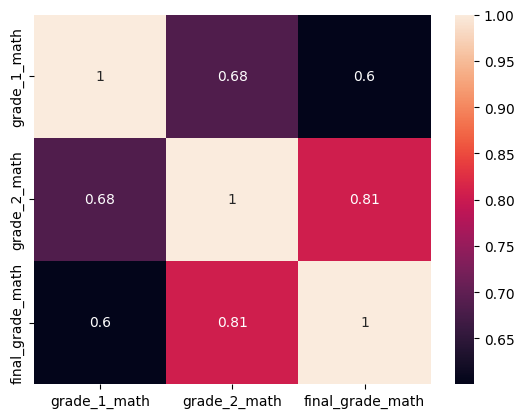

In [22]:
sns.heatmap(bott25.drop(columns=['student_id', 'grade_1_portuguese', 'grade_2_portuguese', 'final_grade_portuguese']).corr(), annot=True)

<Axes: >

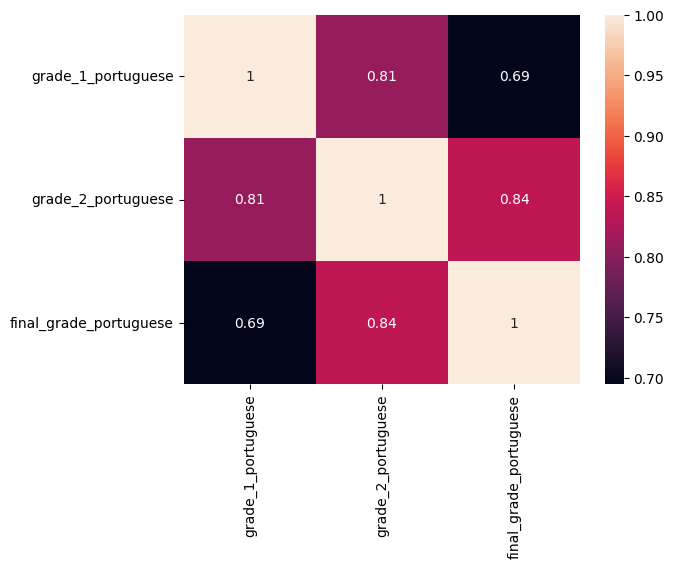

In [21]:
sns.heatmap(bott25.drop(columns=['student_id','grade_1_math', 'grade_2_math', 'final_grade_math']).corr(), annot=True)

In [23]:
#there is extremely high correlation between one score to the next, with the second test having the most power
#next steps will be to re-examine this sub-sample for trends.

In [24]:
focus_df= bott25

In [25]:
def copy_matching_rows(df1, df2):
    """
    Compares two DataFrames by 'student_id' and copies matching rows from df1 to a new DataFrame.

    Parameters:
        df1 (DataFrame): First DataFrame.
        df2 (DataFrame): Second DataFrame.

    Returns:
        DataFrame: New DataFrame containing rows from df1 that match 'student_id' in df2.
    """
    # Merge the two DataFrames on 'student_id'
    merged_df = pd.merge(df1, df2, on='student_id', how='inner')

    # Copy matching rows from df1 to a new DataFrame
    matched_df = df1[df1['student_id'].isin(merged_df['student_id'])]

    return matched_df

In [26]:
focus_df = copy_matching_rows(merged_df,focus_df)

In [27]:
#corr_focus = index_unique_responses(focus_df).corr()
int_focus = index_unique_responses(focus_df)

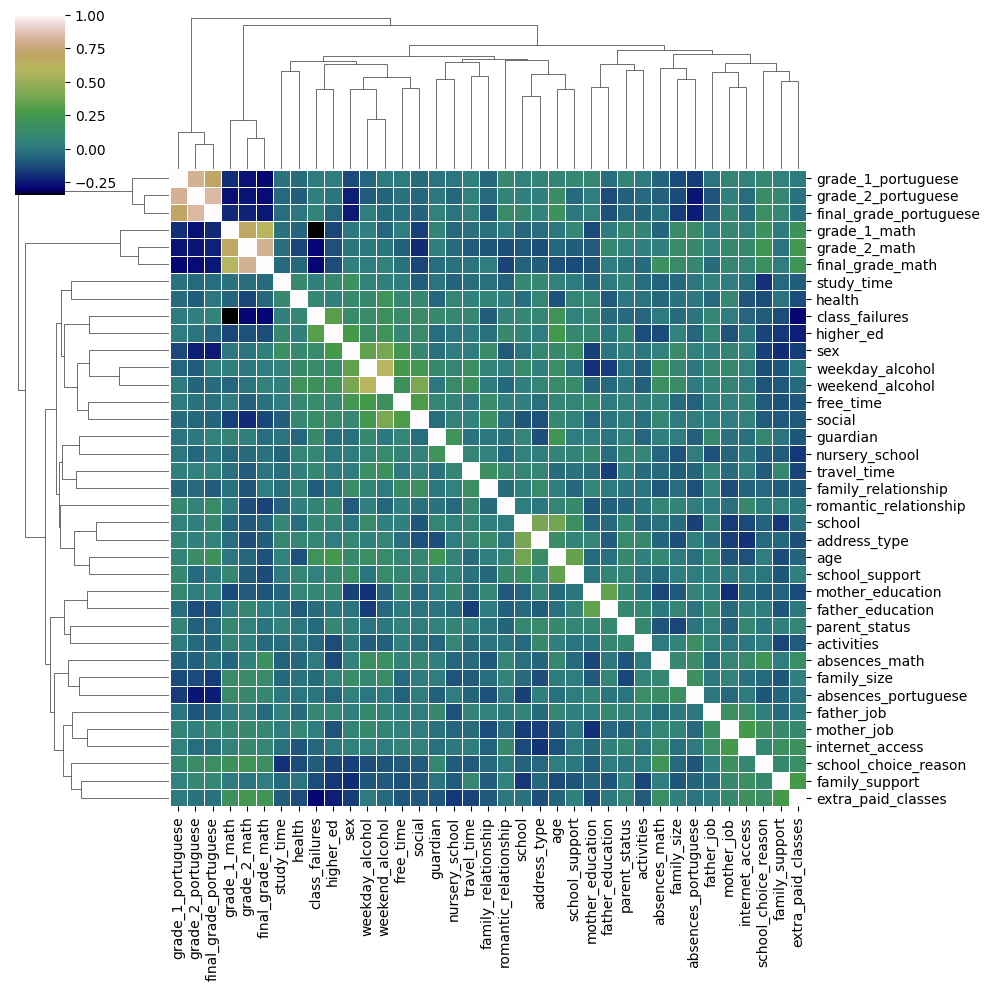

In [28]:
sns.clustermap(int_focus.drop(columns = 'student_id').corr(), linewidths=.5, cmap='gist_earth')

In [29]:
# Remove the column and store it in a variable
absences_portuguese_column = int_focus.pop('absences_portuguese')

# Insert the column at position 31
int_focus.insert(31, 'absences_portuguese', absences_portuguese_column)

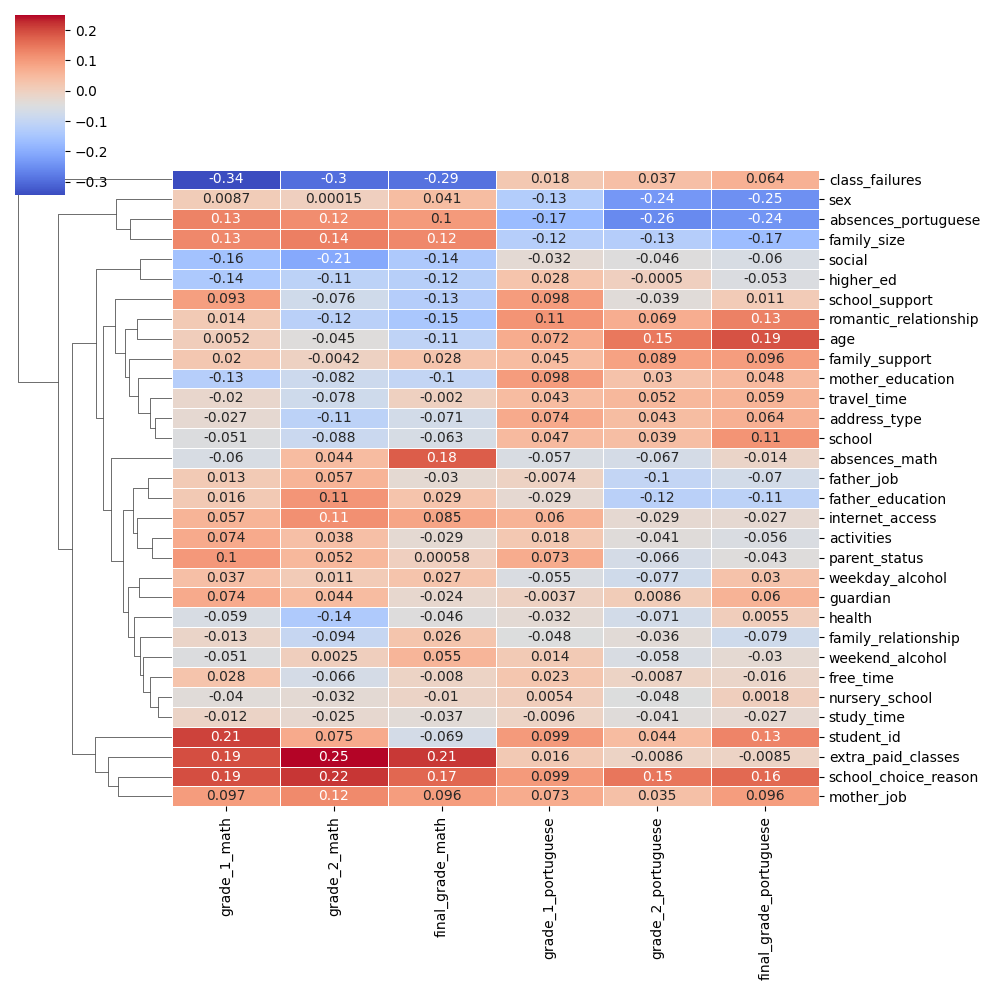

In [30]:
# Select the last 6 columns for the y-axis and the first 28 columns for the x-axis
df_clustermap = int_focus.corr().iloc[:, :32]

# Create the clustermap
sns.clustermap(df_clustermap.T.iloc[::-1, -6:], row_cluster=True, col_cluster=False, cmap='coolwarm',linewidths=.5, annot=True)

plt.show()

In [31]:
'''
Actionalbe Items Math:
  Do:Extra paid classes (What extra classes are being taken by these student esecially around grade 2. extra classes did not have such a powerful effect on the overall population)
  Do Not: have class_failures (What can faculty and parents do to reduce class failures)
Actionalbe Items Portugese:
  Do: Well on the first test. (school support had roughly .2 correleation to grade_1 in both math and portu but almost no existant in this sample )
  Do Not: miss class. (can faculty and parents explore a way to mitigate the damage of missing a language class?)

Things to explore Math: school choice reason. This is a catagorical column to be further explored by data and by faculty.
Things to explore Portu: What effects sex (m/f) is having on students' acedemic success. Is there a bias?
'''

"\nActionalbe Items Math: \n  Do:Extra paid classes (What extra classes are being taken by these student esecially around grade 2. extra classes did not have such a powerful effect on the overall population)\n  Do Not: have class_failures (What can faculty and parents do to reduce class failures)\nActionalbe Items Portugese:\n  Do: Well on the first test. (school support had roughly .2 correleation to grade_1 in both math and portu but almost no existant in this sample )\n  Do Not: miss class. (can faculty and parents explore a way to mitigate the damage of missing a language class?)\n\nThings to explore Math: school choice reason. This is a catagorical column to be further explored by data and by faculty.\nThings to explore Portu: What effects sex (m/f) is having on students' acedemic success. Is there a bias?\n"

In [32]:
#Small Expansion: What is going on with the top 25%. There is an inverse relationship between the created sample between math and portuguese grades which is contrary to the entire group.
#AI Expansion: what combination of parameters would be most likley to put some one in the bottom 25 of each grade.
